In [69]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

ModuleNotFoundError: No module named 'spacy'

### Text Uploading and Time Period Selection

In [62]:
def process_text(volumes):
    """Reads and cleans text data from a list of volumes."""
    text = ""
    for n in volumes:
        file = f"./data/Corpus_txt/mahatma-gandhi-collected-works-volume-{n}.txt"
        with open(file, "r") as file_pointer:
            file_text = file_pointer.read()
            # Remove common unwanted words
            # for word in ['Mahatma', 'Gandhi', 'COLLECTED', 'MAHATMA', 'GANDHI', 'WORKS', 'LETTER', 'photostat']:
            #     file_text = file_text.replace(word, '')
            text += file_text
    return text

text1 = process_text(range( 1, 15))
text2 = process_text(range(15, 62))
text3 = process_text(range(62, 99))

### Preprocessing text

In [63]:
# Define stopwords to be removed from the word cloud
stopwords = set(STOPWORDS)

stopwords.update([
    "mr", "may", "s", "said", "also", "shall", "one", "two", "like", "would",
    "could", "should", "upon", "well", "must", "even", "let", "us", "many",
    "see", "yet", "however", "every", "much", "without", "perhaps", "vol", "n",
    "now", "know", "will", "C", "come", "say", "may", "give", "take", "make", "thing",
    "non", "made", "go", "good"
])

stopwords.update(['Mahatma', 'Gandhi', 'COLLECTED', 'MAHATMA',
                 'GANDHI', 'WORKS', 'LETTER', 'photostat'])


def preprocess_text(text):
    """Cleans text using NLP techniques (stopwords, POS filtering, and lemmatization)."""
    
    doc = nlp(text.lower())  # Convert to lowercase and process with spaCy

    filtered_words = []
    for token in doc:
        if (not token.is_stop  # Remove stopwords
            and token.is_alpha  # Remove numbers, symbols
            and token.pos_ not in ["PRON", "DET", "CCONJ", "AUX", "PART"]):  # Remove unimportant POS
            filtered_words.append(token.lemma_)  # Use lemma (base form)

    return " ".join(filtered_words)

In [64]:
def show_wordcloud(data, title=None, colormap='viridis'):
    """Generate and display a word cloud with enhanced visualization."""
    
    # Generate word cloud
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=15,
        max_font_size=30,
        scale=3,
        random_state=1,
        collocations=False,
        colormap=colormap
    ).generate(str(data))
    
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 1]})
    
    # Display the word cloud
    ax[0].imshow(wordcloud, interpolation="bilinear")
    ax[0].axis("off")
    
    # Title
    if title:
        ax[0].set_title(title, fontsize=20, pad=20)
    
    # Extract word frequencies for a bar chart
    word_freq = wordcloud.words_
    words, freqs = zip(*word_freq.items())
    
    # Plot top words as a bar chart
    ax[1].barh(words[:10], freqs[:10], color=plt.get_cmap(colormap)(np.linspace(0, 1, 10)))
    ax[1].invert_yaxis()  # Invert so highest frequency is at the top
    ax[1].set_xlabel("Frequency")
    ax[1].set_title("Top 10 Words")
    
    plt.tight_layout()
    plt.show()

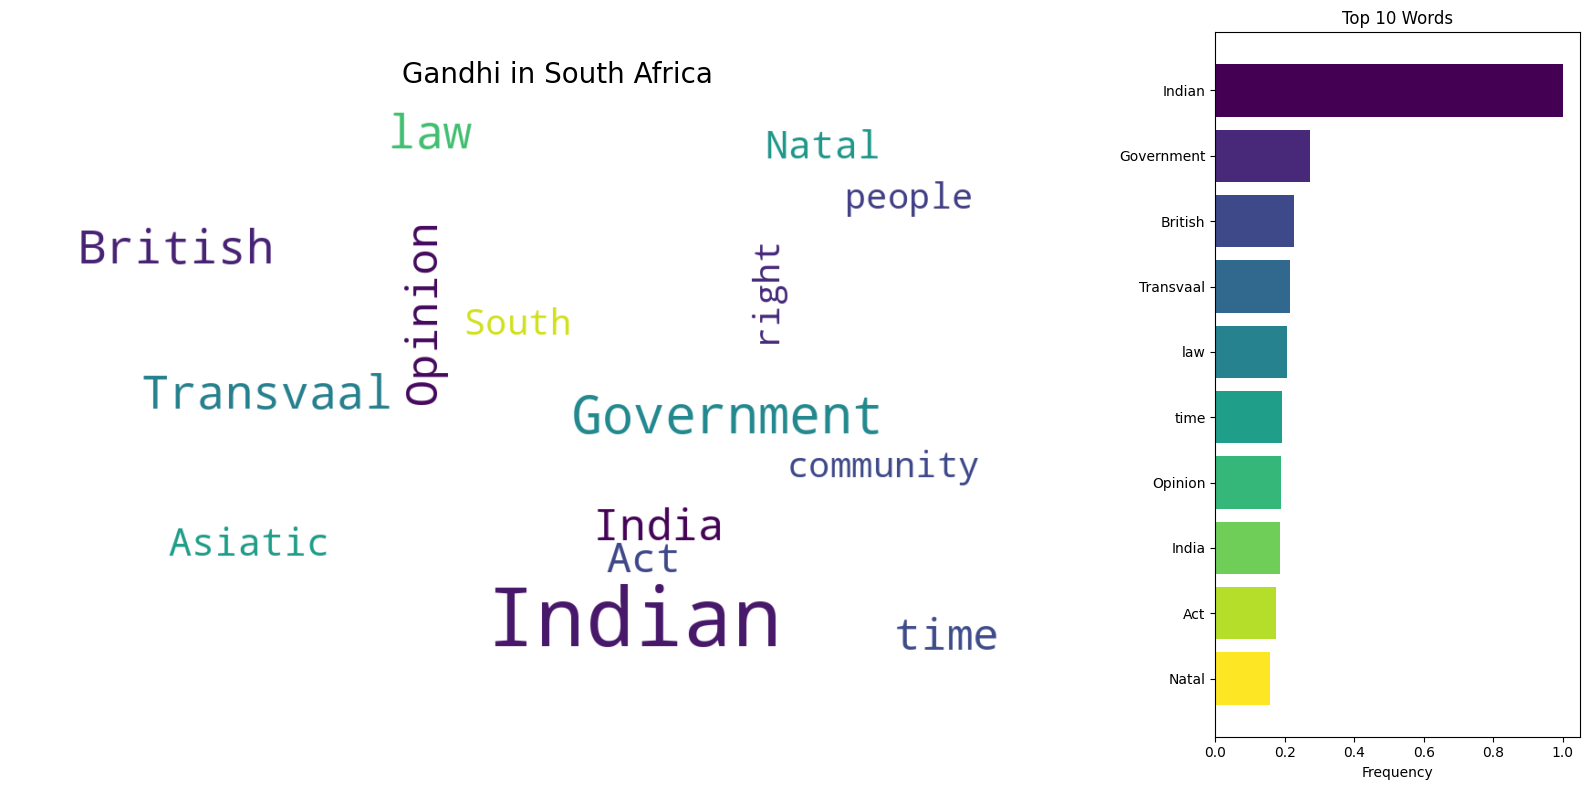

In [65]:
show_wordcloud(text1, title="Gandhi in South Africa")

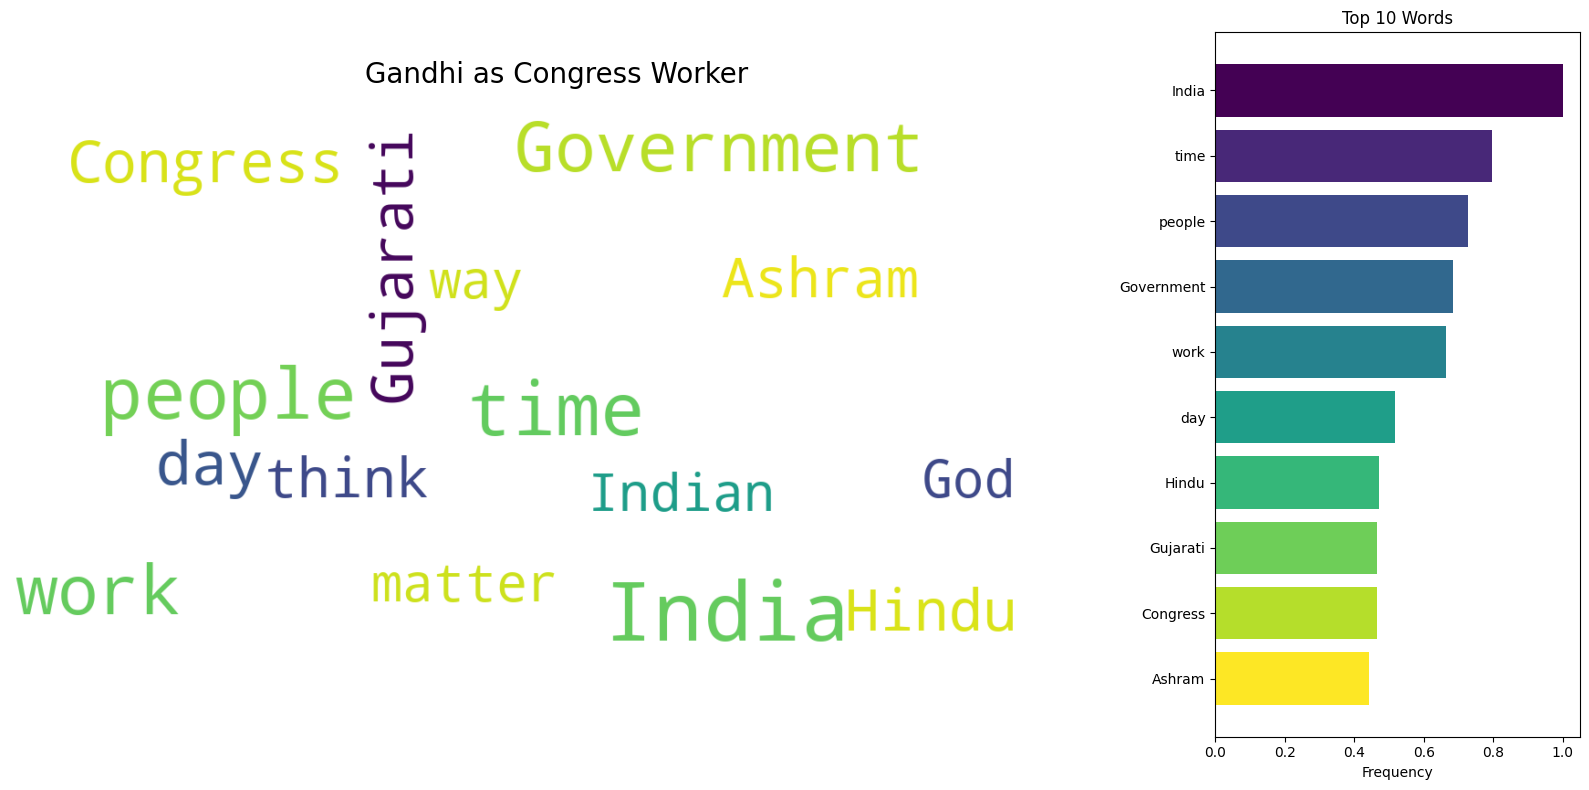

In [66]:
show_wordcloud(text2, title="Gandhi as Congress Worker")

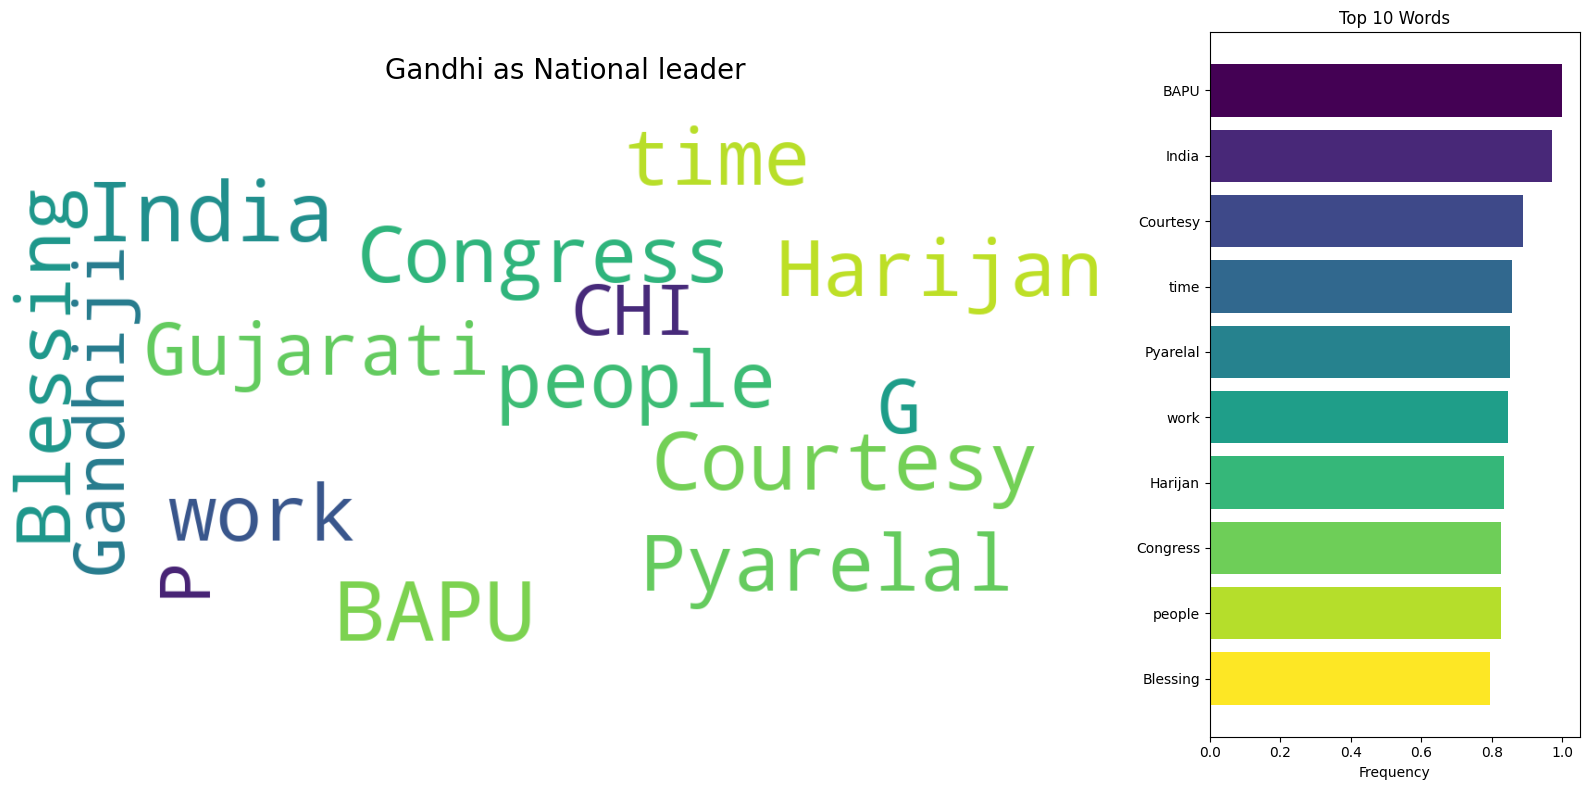

In [68]:
show_wordcloud(text3, title="Gandhi as National leader")